**Connect google drive**

In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Tue Nov 24 13:21:07 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 backup   backup1  'Colab Notebooks'  'My Drive'   wt_cfg_files   yolov3


**1) Clone the Darknet**



In [3]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14479 (delta 7), reused 13 (delta 7), pack-reused 14460
Receiving objects: 100% (14479/14479), 13.22 MiB | 6.18 MiB/s, done.
Resolving deltas: 100% (9842/9842), done.


**2) Compile Darknet using Nvidia GPU**


In [4]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
           

**3) Configure Darknet network for training YOLO V3**

In [5]:
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [6]:
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 4000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=1@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=18@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=18@' cfg/yolov3_training.cfg

In [ ]:
# Create folder on google drive so that we can save there the weights
!mkdir "/content/gdrive/My Drive/backup1"

mkdir: cannot create directory ‘/content/gdrive/My Drive/backup1’: File exists


In [7]:
!echo "licence_plate" > data/obj.names
!echo -e 'classes= 1\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /content/gdrive/My Drive/backup1' > data/obj.data
!mkdir data/obj

In [ ]:
# Download weights darknet model 53
#!wget https://pjreddie.com/media/files/darknet53.conv.74

In [8]:
#weight file
!cp /content/gdrive/My\ Drive/wt_cfg_files/darknet53.conv.74 /content/darknet


**4) Extract Images**

The images need to be inside a zip archive called "images.zip" and they need to be inside the folder "yolov3" on Google Drive

In [9]:
!unzip /content/gdrive/My\ Drive/My\ Drive/yolov3/images1.zip -d data/obj


Archive:  /content/gdrive/My Drive/My Drive/yolov3/images1.zip
  inflating: data/obj/images1/car1_jpg.rf.4cc5f05b4d08ef5012080376b332d6a0.jpg  
  inflating: data/obj/images1/car1_jpg.rf.4cc5f05b4d08ef5012080376b332d6a0.txt  
  inflating: data/obj/images1/car10_jpg.rf.90c4b1d7c34eee7e84d67c0b09806cf3.jpg  
  inflating: data/obj/images1/car10_jpg.rf.90c4b1d7c34eee7e84d67c0b09806cf3.txt  
  inflating: data/obj/images1/car10_jpg.rf.d38f84e7c1098afc00e77ebbd86f596a.jpg  
  inflating: data/obj/images1/car10_jpg.rf.d38f84e7c1098afc00e77ebbd86f596a.txt  
  inflating: data/obj/images1/car10_jpg.rf.eaf2384db260db22e42d6a385e03efa4.jpg  
  inflating: data/obj/images1/car10_jpg.rf.eaf2384db260db22e42d6a385e03efa4.txt  
  inflating: data/obj/images1/car11_jpg.rf.2e4cb76beee0bc6119138e376b237ee7.jpg  
  inflating: data/obj/images1/car11_jpg.rf.2e4cb76beee0bc6119138e376b237ee7.txt  
  inflating: data/obj/images1/car11_jpg.rf.84c2f187f76cba1dced3fb93439895f0.jpg  
  inflating: data/obj/images1/car11_j

In [10]:
# We're going to convert the class index on the .txt files. As we're working with only one class, it's supposed to be class 0.
# If the index is different from 0 then we're going to change it.
import glob
import os
import re

txt_file_paths = glob.glob(r"data/obj/images1/*.txt")
for i, file_path in enumerate(txt_file_paths):
    # get image size
    with open(file_path, "r") as f_o:
        lines = f_o.readlines()

        text_converted = []
        for line in lines:
            print(line)
            numbers = re.findall("[0-9.]+", line)
            print(numbers)
            if numbers:

                # Define coordinates
                text = "{} {} {} {} {}".format(0, numbers[1], numbers[2], numbers[3], numbers[4])
                text_converted.append(text)
                print(i, file_path)
                print(text)
        # Write file
        with open(file_path, 'w') as fp:
            for item in text_converted:
                fp.writelines("%s\n" % item)

0 0.21095890410958903 0.680284191829485 0.2958904109589041 0.12078152753108348 
['0', '0.21095890410958903', '0.680284191829485', '0.2958904109589041', '0.12078152753108348']
0 data/obj/images1/image(33).txt
0 0.21095890410958903 0.680284191829485 0.2958904109589041 0.12078152753108348
0 0.39663461538461536 0.4170673076923077 0.20072115384615385 0.05889423076923077
['0', '0.39663461538461536', '0.4170673076923077', '0.20072115384615385', '0.05889423076923077']
1 data/obj/images1/car5_JPG.rf.d6ed3974688a9441516136474b7c945c.txt
0 0.39663461538461536 0.4170673076923077 0.20072115384615385 0.05889423076923077
0 0.4891826923076923 0.6478365384615384 0.37740384615384615 0.13221153846153846
['0', '0.4891826923076923', '0.6478365384615384', '0.37740384615384615', '0.13221153846153846']
2 data/obj/images1/car25_jpg.rf.c018bd1fa1f845467c32fc89711e2655.txt
0 0.4891826923076923 0.6478365384615384 0.37740384615384615 0.13221153846153846
0 0.4891826923076923 0.5552884615384616 0.22355769230769232 0

In [11]:
import glob
images_list = glob.glob("data/obj/images1/*.jpg")
print(images_list)

['data/obj/images1/image(15).jpg', 'data/obj/images1/image(25).jpg', 'data/obj/images1/car15_jpg.rf.b04862d83027f2fb7a9b325286b15afc.jpg', 'data/obj/images1/image(18).jpg', 'data/obj/images1/image(13).jpg', 'data/obj/images1/image(20).jpg', 'data/obj/images1/car24_jpg.rf.697eb4f54d2d363cdce0864d3938c130.jpg', 'data/obj/images1/car28_jpg.rf.eef5598897e635afaea3ce01a9291fbe.jpg', 'data/obj/images1/car23_jpg.rf.333fdca81ae83c5103df712aca092c68.jpg', 'data/obj/images1/car29_jpg.rf.30d2ab34edb4d10863cef250bb029d0e.jpg', 'data/obj/images1/car11_jpg.rf.2e4cb76beee0bc6119138e376b237ee7.jpg', 'data/obj/images1/car19_jpg.rf.7ec2ba4edd9548834f2e997750b698f7.jpg', 'data/obj/images1/image(32).jpg', 'data/obj/images1/car20_jpg.rf.f3150b02fffbd633f2775654dbff5853.jpg', 'data/obj/images1/image(19).jpg', 'data/obj/images1/car18_jpg.rf.9503911599eb0c49460ab6dad6a55174.jpg', 'data/obj/images1/car26_jpg.rf.535621e5fe7f1563e08d4f809427cdac.jpg', 'data/obj/images1/car8_jpg.rf.3a6f4b9a0b35e56b2f877638bd87d74

In [12]:
#Create training.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(images_list)) 
file.close() 

**6) Start the training**

In [ ]:
# Start the training
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_training
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 

In [13]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_training.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_training.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [25]:
!./darknet detector test data/obj.data cfg/yolov3_training.cfg /content/gdrive/MyDrive/backup1/yolov3_training_last.weights /content/gdrive/MyDrive/yolov3/t1.jpg -thresh 0.3

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

In [15]:
import cv2
from google.colab.patches import cv2_imshow

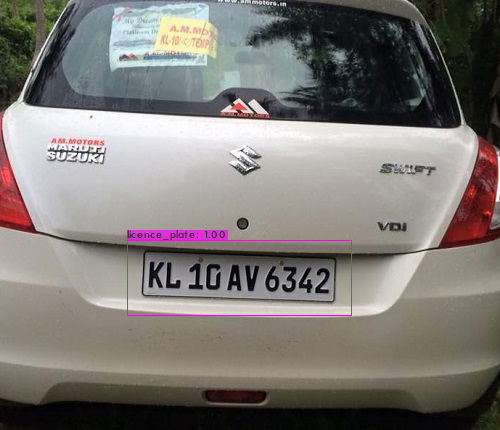

In [26]:
pred=cv2.imread("predictions.jpg")
cv2_imshow(pred)